In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
# Define the exact solution u = H
def exact_solution_h1(x, y, z, t):
    return -3*torch.cos(x)*torch.sin(y)*torch.sin(z)*torch.cos(t)

def initial_condition_h1(x, y, z):
    return -3*torch.cos(x)*torch.sin(y)*torch.sin(z)

In [3]:
# Define the exact solution u = H
def exact_solution_h2(x, y, z, t):
    return -2*torch.sin(x)*torch.cos(y)*torch.sin(z)*torch.cos(t)

def initial_condition_h2(x, y, z):
    return -2*torch.sin(x)*torch.cos(y)*torch.sin(z)

In [4]:
# Define the exact solution u = H
def exact_solution_h3(x, y, z, t):
    return -torch.sin(x)*torch.sin(y)*torch.cos(z)*torch.cos(t)

def initial_condition_h3(x, y, z):
    return -torch.sin(x)*torch.sin(y)*torch.cos(z)

In [5]:
# Define the exact solution p = E
def exact_solution_e1(x, y, z, t):
    return torch.cos(x)*torch.sin(y)*torch.sin(z)*torch.cos(t)

def initial_condition_e1(x, y, z):
    return torch.cos(x)*torch.sin(y)*torch.sin(z) 

In [6]:
# Define the exact solution p = E
def exact_solution_e2(x, y, z, t):
    return torch.sin(x)*torch.cos(y)*torch.sin(z)*torch.cos(t)

def initial_condition_e2(x, y, z):
    return torch.sin(x)*torch.cos(y)*torch.sin(z)

In [7]:
# Define the exact solution p = E
def exact_solution_e3(x, y, z, t):
    return torch.sin(x)*torch.sin(y)*torch.cos(z)*torch.cos(t)

def initial_condition_e3(x, y, z):
    return torch.sin(x)*torch.sin(y)*torch.cos(z) 

In [8]:
# assigning number of points
initial_pts = 200 
left_boundary_pts = 200 
right_boundary_pts = 200
back_boundary_pts = 200
front_boundary_pts = 200
top_boundary_pts = 200
bottom_boundary_pts = 200
residual_pts = 1000

In [9]:
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"

x_init = torch.rand((initial_pts,1)) # initial pts
y_init = torch.rand((initial_pts,1))
z_init = torch.rand((initial_pts,1))
t_init =  0*x_init
init =  torch.cat([x_init, y_init, z_init, t_init],1)
h1_init = initial_condition_h1(init[:,0], init[:, 1], init[:, 2]).reshape(-1, 1)
h2_init = initial_condition_h2(init[:,0], init[:, 1], init[:, 2]).reshape(-1, 1)
h3_init = initial_condition_h3(init[:,0], init[:, 1], init[:, 2]).reshape(-1, 1)
e1_init = initial_condition_e1(init[:,0], init[:, 1], init[:, 2]).reshape(-1, 1)
e2_init = initial_condition_e2(init[:,0], init[:, 1], init[:, 2]).reshape(-1, 1)
e3_init = initial_condition_e3(init[:,0], init[:, 1], init[:, 2]).reshape(-1, 1)
w_init = torch.cat([h1_init, h2_init, h3_init, e1_init, e2_init, e3_init],1)


xb_left = torch.zeros((left_boundary_pts, 1)) # left spatial boundary
yb_left = torch.rand((left_boundary_pts, 1)) # left spatial boundary
zb_left = torch.rand((left_boundary_pts, 1)) # left spatial boundary
tb_left = torch.rand((left_boundary_pts, 1)) # 
b_left = torch.cat([xb_left, yb_left, zb_left, tb_left ],1)
h1_b_l = exact_solution_h1(xb_left, yb_left, zb_left, tb_left).reshape(-1, 1)
h2_b_l = exact_solution_h2(xb_left, yb_left, zb_left, tb_left).reshape(-1, 1)
h3_b_l = exact_solution_h3(xb_left, yb_left, zb_left, tb_left).reshape(-1, 1)
e1_b_l = exact_solution_e1(xb_left, yb_left, zb_left, tb_left).reshape(-1, 1)
e2_b_l = exact_solution_e2(xb_left, yb_left, zb_left, tb_left).reshape(-1, 1)
e3_b_l = exact_solution_e3(xb_left, yb_left, zb_left, tb_left).reshape(-1, 1)



xb_right = torch.ones((right_boundary_pts, 1)) # right spatial boundary
yb_right = torch.rand((right_boundary_pts, 1)) # right spatial boundary
zb_right = torch.rand((right_boundary_pts, 1)) # right spatial boundary
tb_right = torch.rand((right_boundary_pts, 1)) # right boundary pts
b_right = torch.cat([xb_right, yb_right, zb_right, tb_right ],1)
h1_b_r = exact_solution_h1(xb_right, yb_right, zb_right, tb_right).reshape(-1, 1)
h2_b_r = exact_solution_h2(xb_right, yb_right, zb_right, tb_right).reshape(-1, 1)
h3_b_r = exact_solution_h3(xb_right, yb_right, zb_right, tb_right).reshape(-1, 1)
e1_b_r = exact_solution_e1(xb_right, yb_right, zb_right, tb_right).reshape(-1, 1)
e2_b_r = exact_solution_e2(xb_right, yb_right, zb_right, tb_right).reshape(-1, 1)
e3_b_r = exact_solution_e3(xb_right, yb_right, zb_right, tb_right).reshape(-1, 1)



xb_front = torch.rand((front_boundary_pts, 1)) # front spatial boundary
yb_front = torch.zeros((front_boundary_pts, 1)) # front spatial boundary
zb_front = torch.rand((front_boundary_pts, 1)) # front spatial boundary
tb_front = torch.rand((front_boundary_pts, 1)) # 
b_front = torch.cat([xb_front, yb_front, zb_front, tb_front ],1)
h1_b_f = exact_solution_h1(xb_front, yb_front, zb_front, tb_front).reshape(-1, 1)
h2_b_f = exact_solution_h2(xb_front, yb_front, zb_front, tb_front).reshape(-1, 1)
h3_b_f = exact_solution_h3(xb_front, yb_front, zb_front, tb_front).reshape(-1, 1)
e1_b_f = exact_solution_e1(xb_front, yb_front, zb_front, tb_front).reshape(-1, 1)
e2_b_f = exact_solution_e2(xb_front, yb_front, zb_front, tb_front).reshape(-1, 1)
e3_b_f = exact_solution_e3(xb_front, yb_front, zb_front, tb_front).reshape(-1, 1)



xb_back = torch.rand((back_boundary_pts, 1)) # back spatial boundary
yb_back = torch.ones((back_boundary_pts, 1)) # back spatial boundary
zb_back = torch.rand((back_boundary_pts, 1)) # back spatial boundary
tb_back = torch.rand((back_boundary_pts, 1)) # back boundary pts
b_back = torch.cat([xb_back, yb_back, zb_back, tb_back ],1)
h1_b_b = exact_solution_h1(xb_back, yb_back, zb_back, tb_back).reshape(-1, 1)
h2_b_b = exact_solution_h2(xb_back, yb_back, zb_back, tb_back).reshape(-1, 1)
h3_b_b = exact_solution_h3(xb_back, yb_back, zb_back, tb_back).reshape(-1, 1)
e1_b_b = exact_solution_e1(xb_back, yb_back, zb_back, tb_back).reshape(-1, 1)
e2_b_b = exact_solution_e2(xb_back, yb_back, zb_back, tb_back).reshape(-1, 1)
e3_b_b = exact_solution_e3(xb_back, yb_back, zb_back, tb_back).reshape(-1, 1)



xb_top = torch.rand((top_boundary_pts, 1)) # front spatial boundary
yb_top = torch.rand((top_boundary_pts, 1)) # front spatial boundary
zb_top = torch.ones((top_boundary_pts, 1)) # front spatial boundary
tb_top = torch.rand((top_boundary_pts, 1)) # 
b_top = torch.cat([xb_top, yb_top, zb_top, tb_top ],1)
h1_b_t = exact_solution_h1(xb_top, yb_top, zb_top, tb_top).reshape(-1, 1)
h2_b_t = exact_solution_h2(xb_top, yb_top, zb_top, tb_top).reshape(-1, 1)
h3_b_t = exact_solution_h3(xb_top, yb_top, zb_top, tb_top).reshape(-1, 1)
e1_b_t = exact_solution_e1(xb_top, yb_top, zb_top, tb_top).reshape(-1, 1)
e2_b_t = exact_solution_e2(xb_top, yb_top, zb_top, tb_top).reshape(-1, 1)
e3_b_t = exact_solution_e3(xb_top, yb_top, zb_top, tb_top).reshape(-1, 1)


xb_bottom = torch.rand((bottom_boundary_pts, 1)) # front spatial boundary
yb_bottom = torch.rand((bottom_boundary_pts, 1)) # front spatial boundary
zb_bottom = torch.zeros((bottom_boundary_pts, 1)) # front spatial boundary
tb_bottom = torch.rand((bottom_boundary_pts, 1)) # 
b_bottom = torch.cat([xb_bottom, yb_bottom, zb_bottom, tb_bottom ],1)
h1_b_bot = exact_solution_h1(xb_bottom, yb_bottom, zb_bottom, tb_bottom).reshape(-1, 1)
h2_b_bot = exact_solution_h2(xb_bottom, yb_bottom, zb_bottom, tb_bottom).reshape(-1, 1)
h3_b_bot = exact_solution_h3(xb_bottom, yb_bottom, zb_bottom, tb_bottom).reshape(-1, 1)
e1_b_bot = exact_solution_e1(xb_bottom, yb_bottom, zb_bottom, tb_bottom).reshape(-1, 1)
e2_b_bot = exact_solution_e2(xb_bottom, yb_bottom, zb_bottom, tb_bottom).reshape(-1, 1)
e3_b_bot = exact_solution_e3(xb_bottom, yb_bottom, zb_bottom, tb_bottom).reshape(-1, 1)


x_interior = torch.rand((residual_pts, 1))
y_interior = torch.rand((residual_pts, 1))
z_interior = torch.rand((residual_pts, 1))
t_interior = torch.rand((residual_pts, 1))
interior = torch.cat([x_interior, y_interior, z_interior, t_interior],1)





training_set = DataLoader(torch.utils.data.TensorDataset(init, w_init, b_left,  b_right, b_front, b_back, b_top, b_bottom), batch_size=200, shuffle=False)

In [10]:
class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)


In [11]:
# Model definition
my_network = NeuralNet(input_dimension = init.shape[1], output_dimension = w_init.shape[1], n_hidden_layers=4, neurons=20)


In [12]:
def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
#print(my_network(init))

In [13]:
if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")

In [14]:
def fit(model, training_set, interior, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (initial, w_initial, bd_left,  bd_right, bd_front, bd_back, bd_top, bd_bottom) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                # for initial
                initial.requires_grad = True
                w_initial_pred_ = model(initial)
                h1_initial_pred_ = w_initial_pred_[:,0].reshape(-1,1)
                h2_initial_pred_ = w_initial_pred_[:,1].reshape(-1,1)
                h3_initial_pred_ = w_initial_pred_[:,2].reshape(-1,1)
                e1_initial_pred_ = w_initial_pred_[:,3].reshape(-1,1)
                e2_initial_pred_ = w_initial_pred_[:,4].reshape(-1,1)
                e3_initial_pred_ = w_initial_pred_[:,5].reshape(-1,1)
                
                
                # with derivative
                inpu = torch.ones(initial_pts, 1 )
                
                grad_h1_ini = torch.autograd.grad(h1_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                h1_initial_t = grad_h1_ini[:, 3]
                
                grad_h2_ini = torch.autograd.grad(h2_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                h2_initial_t = grad_h2_ini[:, 3]
                
                grad_h3_ini = torch.autograd.grad(h3_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                h3_initial_t = grad_h3_ini[:, 3]
                
                grad_e1_ini = torch.autograd.grad(e1_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                e1_initial_t = grad_e1_ini[:, 3]
                
                grad_e2_ini = torch.autograd.grad(e2_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                e2_initial_t = grad_e2_ini[:, 3]
                
                grad_e3_ini = torch.autograd.grad(e3_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                e3_initial_t = grad_e3_ini[:, 3]
                
                
                # for left boundary
                w_bd_left_pred_ = model(bd_left)
                h1_bd_left_pred_ = w_bd_left_pred_[:,0].reshape(-1,1)
                h2_bd_left_pred_ = w_bd_left_pred_[:,1].reshape(-1,1)
                h3_bd_left_pred_ = w_bd_left_pred_[:,2].reshape(-1,1)
                e1_bd_left_pred_ = w_bd_left_pred_[:,3].reshape(-1,1)
                e2_bd_left_pred_ = w_bd_left_pred_[:,4].reshape(-1,1)
                e3_bd_left_pred_ = w_bd_left_pred_[:,5].reshape(-1,1)
                
                # for right boundary
                w_bd_right_pred_ = model(bd_right)
                h1_bd_right_pred_ = w_bd_right_pred_[:,0].reshape(-1,1)
                h2_bd_right_pred_ = w_bd_right_pred_[:,1].reshape(-1,1)
                h3_bd_right_pred_ = w_bd_right_pred_[:,2].reshape(-1,1)
                e1_bd_right_pred_ = w_bd_right_pred_[:,3].reshape(-1,1)
                e2_bd_right_pred_ = w_bd_right_pred_[:,4].reshape(-1,1)
                e3_bd_right_pred_ = w_bd_right_pred_[:,5].reshape(-1,1)
                
                # for front boundary
                w_bd_front_pred_ = model(bd_front)
                h1_bd_front_pred_ = w_bd_front_pred_[:,0].reshape(-1,1)
                h2_bd_front_pred_ = w_bd_front_pred_[:,1].reshape(-1,1)
                h3_bd_front_pred_ = w_bd_front_pred_[:,2].reshape(-1,1)
                e1_bd_front_pred_ = w_bd_front_pred_[:,3].reshape(-1,1)
                e2_bd_front_pred_ = w_bd_front_pred_[:,4].reshape(-1,1)
                e3_bd_front_pred_ = w_bd_front_pred_[:,5].reshape(-1,1)
                
                # for back boundary
                w_bd_back_pred_ = model(bd_back)
                h1_bd_back_pred_ = w_bd_back_pred_[:,0].reshape(-1,1)
                h2_bd_back_pred_ = w_bd_back_pred_[:,1].reshape(-1,1)
                h3_bd_back_pred_ = w_bd_back_pred_[:,2].reshape(-1,1)
                e1_bd_back_pred_ = w_bd_back_pred_[:,3].reshape(-1,1)
                e2_bd_back_pred_ = w_bd_back_pred_[:,4].reshape(-1,1)
                e3_bd_back_pred_ = w_bd_back_pred_[:,5].reshape(-1,1)
                
                # for top boundary
                w_bd_top_pred_ = model(bd_top)
                h1_bd_top_pred_ = w_bd_top_pred_[:,0].reshape(-1,1)
                h2_bd_top_pred_ = w_bd_top_pred_[:,1].reshape(-1,1)
                h3_bd_top_pred_ = w_bd_top_pred_[:,2].reshape(-1,1)
                e1_bd_top_pred_ = w_bd_top_pred_[:,3].reshape(-1,1)
                e2_bd_top_pred_ = w_bd_top_pred_[:,4].reshape(-1,1)
                e3_bd_top_pred_ = w_bd_top_pred_[:,5].reshape(-1,1)
                
                # for bottom boundary
                w_bd_bottom_pred_ = model(bd_bottom)
                h1_bd_bottom_pred_ = w_bd_bottom_pred_[:,0].reshape(-1,1)
                h2_bd_bottom_pred_ = w_bd_bottom_pred_[:,1].reshape(-1,1)
                h3_bd_bottom_pred_ = w_bd_bottom_pred_[:,2].reshape(-1,1)
                e1_bd_bottom_pred_ = w_bd_bottom_pred_[:,3].reshape(-1,1)
                e2_bd_bottom_pred_ = w_bd_bottom_pred_[:,4].reshape(-1,1)
                e3_bd_bottom_pred_ = w_bd_bottom_pred_[:,5].reshape(-1,1)
                
                # residual calculation
                interior.requires_grad = True
                w_hat = model(interior)
                h1_hat = w_hat[:,0].reshape(-1,1)
                h2_hat = w_hat[:,1].reshape(-1,1)
                h3_hat = w_hat[:,2].reshape(-1,1)
                e1_hat = w_hat[:,3].reshape(-1,1)
                e2_hat = w_hat[:,4].reshape(-1,1)
                e3_hat = w_hat[:,5].reshape(-1,1)
                
                inputs = torch.ones(residual_pts, 1 )
                inputs2 = torch.ones(residual_pts, 1)
                
                grad_h1_hat = torch.autograd.grad(h1_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                h1_x = grad_h1_hat[:, 0].reshape(-1,1)
                h1_y = grad_h1_hat[:, 1].reshape(-1,1)
                h1_z = grad_h1_hat[:, 2].reshape(-1,1)
                
                grad_h2_hat = torch.autograd.grad(h2_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                h2_x = grad_h2_hat[:, 0].reshape(-1,1)
                h2_y = grad_h2_hat[:, 1].reshape(-1,1)
                h2_z = grad_h2_hat[:, 2].reshape(-1,1)
                
                grad_h3_hat = torch.autograd.grad(h3_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                h3_x = grad_h3_hat[:, 0].reshape(-1,1)
                h3_y = grad_h3_hat[:, 1].reshape(-1,1)
                h3_z = grad_h3_hat[:, 2].reshape(-1,1)
                
                grad_e1_hat = torch.autograd.grad(e1_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                e1_x = grad_e1_hat[:, 0].reshape(-1,1)
                e1_y = grad_e1_hat[:, 1].reshape(-1,1)
                e1_z = grad_e1_hat[:, 2].reshape(-1,1)
                
                grad_e2_hat = torch.autograd.grad(e2_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                e2_x = grad_e2_hat[:, 0].reshape(-1,1)
                e2_y = grad_e2_hat[:, 1].reshape(-1,1)
                e2_z = grad_e2_hat[:, 2].reshape(-1,1)
                
                grad_e3_hat = torch.autograd.grad(e3_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                e3_x = grad_e3_hat[:, 0].reshape(-1,1)
                e3_y = grad_e3_hat[:, 1].reshape(-1,1)
                e3_z = grad_e3_hat[:, 2].reshape(-1,1)
                
                h1_t = grad_h1_hat[:, 3].reshape(-1,1)
                h2_t = grad_h2_hat[:, 3].reshape(-1,1)
                h3_t = grad_h3_hat[:, 3].reshape(-1,1)
                e1_t = grad_e1_hat[:, 3].reshape(-1,1)
                e2_t = grad_e2_hat[:, 3].reshape(-1,1)
                e3_t = grad_e3_hat[:, 3].reshape(-1,1)
                
                
                # Item 1. below
                loss1 = torch.mean((h1_initial_pred_.reshape(-1, ) - w_initial[:,0].reshape(-1, ))**p) + 0.1*torch.mean((h1_t.reshape(-1, ) + 3*e1_t.reshape(-1, ) + e3_y.reshape(-1, ) - e2_z.reshape(-1, ))**p)+torch.mean((h1_bd_left_pred_.reshape(-1,)- h1_b_l.reshape(-1,))**p) + torch.mean((h1_bd_right_pred_.reshape(-1,)- h1_b_r.reshape(-1,))**p) +torch.mean((h1_bd_front_pred_.reshape(-1,)- h1_b_f.reshape(-1,))**p) + torch.mean((h1_bd_back_pred_.reshape(-1,)- h1_b_b.reshape(-1,))**p) +torch.mean((h1_bd_top_pred_.reshape(-1,)- h1_b_t.reshape(-1,))**p) + torch.mean((h1_bd_bottom_pred_.reshape(-1,)- h1_b_bot.reshape(-1,))**p)
                loss2 = torch.mean((h2_initial_pred_.reshape(-1, ) - w_initial[:,1].reshape(-1, ))**p) + 0.1*torch.mean((h2_t.reshape(-1, ) + 2*e2_t.reshape(-1, ) + e1_z.reshape(-1, ) - e3_x.reshape(-1, ))**p)+torch.mean((h2_bd_left_pred_.reshape(-1,)- h2_b_l.reshape(-1,))**p) + torch.mean((h2_bd_right_pred_.reshape(-1,)- h2_b_r.reshape(-1,))**p) +torch.mean((h2_bd_front_pred_.reshape(-1,)- h2_b_f.reshape(-1,))**p) + torch.mean((h2_bd_back_pred_.reshape(-1,)- h2_b_b.reshape(-1,))**p) +torch.mean((h2_bd_top_pred_.reshape(-1,)- h2_b_t.reshape(-1,))**p) + torch.mean((h2_bd_bottom_pred_.reshape(-1,)- h2_b_bot.reshape(-1,))**p)
                loss3 = torch.mean((h3_initial_pred_.reshape(-1, ) - w_initial[:,2].reshape(-1, ))**p) + 0.1*torch.mean((h3_t.reshape(-1, ) + e3_t.reshape(-1, ) + e2_x.reshape(-1, ) - e1_y.reshape(-1, ))**p)+torch.mean((h3_bd_left_pred_.reshape(-1,)- h3_b_l.reshape(-1,))**p) + torch.mean((h3_bd_right_pred_.reshape(-1,)- h3_b_r.reshape(-1,))**p) +torch.mean((h3_bd_front_pred_.reshape(-1,)- h3_b_f.reshape(-1,))**p) + torch.mean((h3_bd_back_pred_.reshape(-1,)- h3_b_b.reshape(-1,))**p) +torch.mean((h3_bd_top_pred_.reshape(-1,)- h3_b_t.reshape(-1,))**p) + torch.mean((h3_bd_bottom_pred_.reshape(-1,)- h3_b_bot.reshape(-1,))**p)
                loss4 = torch.mean((e1_initial_pred_.reshape(-1, ) - w_initial[:,3].reshape(-1, ))**p)+ 0.1*torch.mean((9*e1_t.reshape(-1, ) + 3*h1_t.reshape(-1, )  - h3_y.reshape(-1, ) + h2_z.reshape(-1, ) + torch.sin(interior[:, 0])*torch.cos(interior[:, 1])*torch.cos(interior[:, 2])*torch.cos(interior[:, 3]))**p) +torch.mean((e1_bd_left_pred_.reshape(-1,)- e1_b_l.reshape(-1,))**p) + torch.mean((e1_bd_right_pred_.reshape(-1,)- e1_b_r.reshape(-1,))**p) +torch.mean((e1_bd_front_pred_.reshape(-1,)- e1_b_f.reshape(-1,))**p) + torch.mean((e1_bd_back_pred_.reshape(-1,)- e1_b_b.reshape(-1,))**p) +torch.mean((e1_bd_top_pred_.reshape(-1,)- e1_b_t.reshape(-1,))**p) + torch.mean((e1_bd_bottom_pred_.reshape(-1,)- e1_b_bot.reshape(-1,))**p)
                loss5 = torch.mean((e2_initial_pred_.reshape(-1, ) - w_initial[:,4].reshape(-1, ))**p)+ 0.1*torch.mean((4*e2_t.reshape(-1, ) + 2*h2_t.reshape(-1, )  - h1_z.reshape(-1, ) + h3_x.reshape(-1, ) - 2*torch.cos(interior[:, 0])*torch.sin(interior[:, 1])*torch.cos(interior[:, 2])*torch.cos(interior[:, 3]))**p) +torch.mean((e2_bd_left_pred_.reshape(-1,)- e2_b_l.reshape(-1,))**p) + torch.mean((e2_bd_right_pred_.reshape(-1,)- e2_b_r.reshape(-1,))**p) +torch.mean((e2_bd_front_pred_.reshape(-1,)- e2_b_f.reshape(-1,))**p) + torch.mean((e2_bd_back_pred_.reshape(-1,)- e2_b_b.reshape(-1,))**p) +torch.mean((e2_bd_top_pred_.reshape(-1,)- e2_b_t.reshape(-1,))**p) + torch.mean((e2_bd_bottom_pred_.reshape(-1,)- e2_b_bot.reshape(-1,))**p)
                loss6 = torch.mean((e3_initial_pred_.reshape(-1, ) - w_initial[:,5].reshape(-1, ))**p)+ 0.1*torch.mean((e3_t.reshape(-1, ) + h3_t.reshape(-1, )  - h2_x.reshape(-1, ) + h1_y.reshape(-1, ) + torch.cos(interior[:, 0])*torch.cos(interior[:, 1])*torch.sin(interior[:, 2])*torch.cos(interior[:, 3]))**p) +torch.mean((e3_bd_left_pred_.reshape(-1,)- e3_b_l.reshape(-1,))**p) + torch.mean((e3_bd_right_pred_.reshape(-1,)- e3_b_r.reshape(-1,))**p) +torch.mean((e3_bd_front_pred_.reshape(-1,)- e3_b_f.reshape(-1,))**p) + torch.mean((e3_bd_back_pred_.reshape(-1,)- e3_b_b.reshape(-1,))**p) +torch.mean((e3_bd_top_pred_.reshape(-1,)- e3_b_t.reshape(-1,))**p) + torch.mean((e3_bd_bottom_pred_.reshape(-1,)- e3_b_bot.reshape(-1,))**p)
                loss = loss1 + loss2 + loss3 + loss4 + loss5 + loss6
                
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history


In [15]:
n_epochs = 5000
history = fit(my_network, training_set, interior, n_epochs, optimizer_, p=2, verbose=True )

################################  0  ################################
Loss:  98.84212493896484
################################  1  ################################
Loss:  97.7593994140625
################################  2  ################################
Loss:  86.12255096435547
################################  3  ################################
Loss:  71.79353332519531
################################  4  ################################
Loss:  63.75960159301758
################################  5  ################################
Loss:  57.41139602661133
################################  6  ################################
Loss:  50.96440887451172
################################  7  ################################
Loss:  44.47937774658203
################################  8  ################################
Loss:  38.05036926269531
################################  9  ################################
Loss:  31.262859344482422
################################  10  ############

Loss:  0.13437707722187042
################################  87  ################################
Loss:  0.1304183304309845
################################  88  ################################
Loss:  0.12681081891059875
################################  89  ################################
Loss:  0.12337058037519455
################################  90  ################################
Loss:  0.12004727125167847
################################  91  ################################
Loss:  0.11696715652942657
################################  92  ################################
Loss:  0.11401310563087463
################################  93  ################################
Loss:  0.11136659234762192
################################  94  ################################
Loss:  0.10891810059547424
################################  95  ################################
Loss:  0.10668999701738358
################################  96  ################################
Loss:  0.104615688323

Loss:  0.027428073808550835
################################  173  ################################
Loss:  0.026992160826921463
################################  174  ################################
Loss:  0.02658390998840332
################################  175  ################################
Loss:  0.026163456961512566
################################  176  ################################
Loss:  0.02575664222240448
################################  177  ################################
Loss:  0.025335852056741714
################################  178  ################################
Loss:  0.024970784783363342
################################  179  ################################
Loss:  0.024630330502986908
################################  180  ################################
Loss:  0.024303127080202103
################################  181  ################################
Loss:  0.02399057149887085
################################  182  ################################
Los

Loss:  0.011496697552502155
################################  261  ################################
Loss:  0.011393578723073006
################################  262  ################################
Loss:  0.011294826865196228
################################  263  ################################
Loss:  0.011200997047126293
################################  264  ################################
Loss:  0.011113256216049194
################################  265  ################################
Loss:  0.01103177759796381
################################  266  ################################
Loss:  0.010955845937132835
################################  267  ################################
Loss:  0.010886589996516705
################################  268  ################################
Loss:  0.010819470509886742
################################  269  ################################
Loss:  0.01075839251279831
################################  270  ################################
Lo

Loss:  0.006255326326936483
################################  350  ################################
Loss:  0.006213877350091934
################################  351  ################################
Loss:  0.006173666566610336
################################  352  ################################
Loss:  0.006135774310678244
################################  353  ################################
Loss:  0.0060989526100456715
################################  354  ################################
Loss:  0.006063253618776798
################################  355  ################################
Loss:  0.006027191877365112
################################  356  ################################
Loss:  0.005990704987198114
################################  357  ################################
Loss:  0.005951478146016598
################################  358  ################################
Loss:  0.005907532759010792
################################  359  ################################

Loss:  0.0037554993759840727
################################  441  ################################
Loss:  0.0037396301049739122
################################  442  ################################
Loss:  0.0037226504646241665
################################  443  ################################
Loss:  0.003706004936248064
################################  444  ################################
Loss:  0.0036897356621921062
################################  445  ################################
Loss:  0.0036737117916345596
################################  446  ################################
Loss:  0.003657082561403513
################################  447  ################################
Loss:  0.003640614915639162
################################  448  ################################
Loss:  0.0036257177125662565
################################  449  ################################
Loss:  0.0036115115508437157
################################  450  ##########################

Loss:  0.002697089221328497
################################  524  ################################
Loss:  0.0026854246389120817
################################  525  ################################
Loss:  0.0026733828708529472
################################  526  ################################
Loss:  0.002659822814166546
################################  527  ################################
Loss:  0.0026487044524401426
################################  528  ################################
Loss:  0.0026370445266366005
################################  529  ################################
Loss:  0.0026234220713377
################################  530  ################################
Loss:  0.0026132832281291485
################################  531  ################################
Loss:  0.002602870110422373
################################  532  ################################
Loss:  0.002591619733721018
################################  533  ##############################

Loss:  0.0018833528738468885
################################  618  ################################
Loss:  0.0018790197791531682
################################  619  ################################
Loss:  0.0018750035669654608
################################  620  ################################
Loss:  0.001870853127911687
################################  621  ################################
Loss:  0.001867644372396171
################################  622  ################################
Loss:  0.0018644544761627913
################################  623  ################################
Loss:  0.001860921154730022
################################  624  ################################
Loss:  0.0018569419626146555
################################  625  ################################
Loss:  0.0018530265660956502
################################  626  ################################
Loss:  0.0018493932439014316
################################  627  ##########################

Loss:  0.0015532159013673663
################################  706  ################################
Loss:  0.0015457612462341785
################################  707  ################################
Loss:  0.0015386930899694562
################################  708  ################################
Loss:  0.0015318309888243675
################################  709  ################################
Loss:  0.00152502057608217
################################  710  ################################
Loss:  0.0015185067895799875
################################  711  ################################
Loss:  0.0015123797347769141
################################  712  ################################
Loss:  0.0015066979685798287
################################  713  ################################
Loss:  0.0015012359945103526
################################  714  ################################
Loss:  0.0014964889269322157
################################  715  #########################

Loss:  0.0012483024038374424
################################  788  ################################
Loss:  0.0012449728092178702
################################  789  ################################
Loss:  0.0012422597501426935
################################  790  ################################
Loss:  0.00123912887647748
################################  791  ################################
Loss:  0.0012357181403785944
################################  792  ################################
Loss:  0.0012326204450801015
################################  793  ################################
Loss:  0.0012290776940062642
################################  794  ################################
Loss:  0.0012261142255738378
################################  795  ################################
Loss:  0.0012232252629473805
################################  796  ################################
Loss:  0.0012196246534585953
################################  797  #########################

Loss:  0.0010465857340022922
################################  873  ################################
Loss:  0.0010432580020278692
################################  874  ################################
Loss:  0.0010401816107332706
################################  875  ################################
Loss:  0.001037069596350193
################################  876  ################################
Loss:  0.001033774926327169
################################  877  ################################
Loss:  0.001030639628879726
################################  878  ################################
Loss:  0.0010276591638103127
################################  879  ################################
Loss:  0.0010249059414491057
################################  880  ################################
Loss:  0.0010222855489701033
################################  881  ################################
Loss:  0.0010197798255831003
################################  882  ##########################

Loss:  0.000880564795807004
################################  956  ################################
Loss:  0.0008792747394181788
################################  957  ################################
Loss:  0.0008780189091339707
################################  958  ################################
Loss:  0.0008768297848291695
################################  959  ################################
Loss:  0.0008756675524637103
################################  960  ################################
Loss:  0.0008745440281927586
################################  961  ################################
Loss:  0.0008734650909900665
################################  962  ################################
Loss:  0.0008723998325876892
################################  963  ################################
Loss:  0.0008713651914149523
################################  964  ################################
Loss:  0.0008703332277946174
################################  965  ########################

################################  1037  ################################
Loss:  0.0007800683379173279
################################  1038  ################################
Loss:  0.0007790855597704649
################################  1039  ################################
Loss:  0.0007782118045724928
################################  1040  ################################
Loss:  0.0007772492244839668
################################  1041  ################################
Loss:  0.0007764993351884186
################################  1042  ################################
Loss:  0.0007757012499496341
################################  1043  ################################
Loss:  0.0007747919298708439
################################  1044  ################################
Loss:  0.0007739074062556028
################################  1045  ################################
Loss:  0.0007730384822934866
################################  1046  ################################
Loss:  0.

Loss:  0.000705747923348099
################################  1121  ################################
Loss:  0.0007047699182294309
################################  1122  ################################
Loss:  0.0007035974995233119
################################  1123  ################################
Loss:  0.0007026988314464688
################################  1124  ################################
Loss:  0.0007016698364168406
################################  1125  ################################
Loss:  0.0007005587103776634
################################  1126  ################################
Loss:  0.0006994580617174506
################################  1127  ################################
Loss:  0.0006983886705711484
################################  1128  ################################
Loss:  0.000697324809152633
################################  1129  ################################
Loss:  0.0006963025662116706
################################  1130  ###############

Loss:  0.0006235971814021468
################################  1205  ################################
Loss:  0.0006227073608897626
################################  1206  ################################
Loss:  0.0006218397174961865
################################  1207  ################################
Loss:  0.0006209317361935973
################################  1208  ################################
Loss:  0.000620088423602283
################################  1209  ################################
Loss:  0.0006192360306158662
################################  1210  ################################
Loss:  0.0006184560479596257
################################  1211  ################################
Loss:  0.0006176676834002137
################################  1212  ################################
Loss:  0.0006169044063426554
################################  1213  ################################
Loss:  0.0006161477067507803
################################  1214  ##############

Loss:  0.0005508115282282233
################################  1292  ################################
Loss:  0.0005503463326022029
################################  1293  ################################
Loss:  0.0005498272948898375
################################  1294  ################################
Loss:  0.000549356103874743
################################  1295  ################################
Loss:  0.0005488794995471835
################################  1296  ################################
Loss:  0.0005483510321937501
################################  1297  ################################
Loss:  0.000547831179574132
################################  1298  ################################
Loss:  0.0005472696502692997
################################  1299  ################################
Loss:  0.0005467052687890828
################################  1300  ################################
Loss:  0.0005460789543576539
################################  1301  ###############

Loss:  0.0004899405757896602
################################  1387  ################################
Loss:  0.0004894646699540317
################################  1388  ################################
Loss:  0.0004889809642918408
################################  1389  ################################
Loss:  0.0004884987720288336
################################  1390  ################################
Loss:  0.0004880054038949311
################################  1391  ################################
Loss:  0.00048750860150903463
################################  1392  ################################
Loss:  0.0004869986732956022
################################  1393  ################################
Loss:  0.0004865029768552631
################################  1394  ################################
Loss:  0.00048601703019812703
################################  1395  ################################
Loss:  0.0004855184815824032
################################  1396  ###########

Loss:  0.0004381132894195616
################################  1471  ################################
Loss:  0.000437664712080732
################################  1472  ################################
Loss:  0.0004372307157609612
################################  1473  ################################
Loss:  0.0004367947403807193
################################  1474  ################################
Loss:  0.0004363622283563018
################################  1475  ################################
Loss:  0.0004359065496828407
################################  1476  ################################
Loss:  0.00043544411892071366
################################  1477  ################################
Loss:  0.0004349874216131866
################################  1478  ################################
Loss:  0.00043453022954054177
################################  1479  ################################
Loss:  0.0004340538289397955
################################  1480  ############

Loss:  0.00040326747694052756
################################  1558  ################################
Loss:  0.00040287277079187334
################################  1559  ################################
Loss:  0.00040240681846626103
################################  1560  ################################
Loss:  0.0004017593164462596
################################  1561  ################################
Loss:  0.00040125465602613986
################################  1562  ################################
Loss:  0.0004006551462225616
################################  1563  ################################
Loss:  0.0003999790642410517
################################  1564  ################################
Loss:  0.00039926718454807997
################################  1565  ################################
Loss:  0.00039860920514911413
################################  1566  ################################
Loss:  0.00039792043389752507
################################  1567  ######

Loss:  0.00036363035906106234
################################  1645  ################################
Loss:  0.00036303960951045156
################################  1646  ################################
Loss:  0.00036242668284103274
################################  1647  ################################
Loss:  0.0003617514739744365
################################  1648  ################################
Loss:  0.0003610741696320474
################################  1649  ################################
Loss:  0.0003605165984481573
################################  1650  ################################
Loss:  0.0003600164200179279
################################  1651  ################################
Loss:  0.00035950576420873404
################################  1652  ################################
Loss:  0.0003590488340705633
################################  1653  ################################
Loss:  0.00035859725903719664
################################  1654  ########

Loss:  0.000327377172652632
################################  1728  ################################
Loss:  0.00032700010342523456
################################  1729  ################################
Loss:  0.00032659457065165043
################################  1730  ################################
Loss:  0.0003262152895331383
################################  1731  ################################
Loss:  0.0003258117358200252
################################  1732  ################################
Loss:  0.0003254721814300865
################################  1733  ################################
Loss:  0.00032511880272068083
################################  1734  ################################
Loss:  0.0003247202839702368
################################  1735  ################################
Loss:  0.0003242752281948924
################################  1736  ################################
Loss:  0.00032386655220761895
################################  1737  ##########

Loss:  0.0002983737795148045
################################  1811  ################################
Loss:  0.00029803416691720486
################################  1812  ################################
Loss:  0.0002977275871671736
################################  1813  ################################
Loss:  0.0002974277886096388
################################  1814  ################################
Loss:  0.00029714213451370597
################################  1815  ################################
Loss:  0.0002968462649732828
################################  1816  ################################
Loss:  0.0002965549938380718
################################  1817  ################################
Loss:  0.00029628278571181
################################  1818  ################################
Loss:  0.0002959846460726112
################################  1819  ################################
Loss:  0.00029570775222964585
################################  1820  ############

Loss:  0.00027413188945502043
################################  1891  ################################
Loss:  0.0002738102921284735
################################  1892  ################################
Loss:  0.00027344602858647704
################################  1893  ################################
Loss:  0.00027309151482768357
################################  1894  ################################
Loss:  0.0002726829843595624
################################  1895  ################################
Loss:  0.00027226400561630726
################################  1896  ################################
Loss:  0.0002718311152420938
################################  1897  ################################
Loss:  0.00027143085026182234
################################  1898  ################################
Loss:  0.0002710263361223042
################################  1899  ################################
Loss:  0.0002706411178223789
################################  1900  ########

Loss:  0.00025171219022013247
################################  1973  ################################
Loss:  0.0002514826483093202
################################  1974  ################################
Loss:  0.0002512575883883983
################################  1975  ################################
Loss:  0.0002510000194888562
################################  1976  ################################
Loss:  0.00025079725310206413
################################  1977  ################################
Loss:  0.00025055481819435954
################################  1978  ################################
Loss:  0.00025031823315657675
################################  1979  ################################
Loss:  0.00025006578653119504
################################  1980  ################################
Loss:  0.0002497904933989048
################################  1981  ################################
Loss:  0.0002495337976142764
################################  1982  ########

Loss:  0.0002332392323296517
################################  2054  ################################
Loss:  0.00023313648125622422
################################  2055  ################################
Loss:  0.00023304388741962612
################################  2056  ################################
Loss:  0.00023295931168831885
################################  2057  ################################
Loss:  0.00023287071962840855
################################  2058  ################################
Loss:  0.00023277770378626883
################################  2059  ################################
Loss:  0.00023268238874152303
################################  2060  ################################
Loss:  0.0002325844398001209
################################  2061  ################################
Loss:  0.00023247985518537462
################################  2062  ################################
Loss:  0.00023239041911438107
################################  2063  #####

Loss:  0.00021783207193948328
################################  2134  ################################
Loss:  0.0002175923145841807
################################  2135  ################################
Loss:  0.00021733203902840614
################################  2136  ################################
Loss:  0.00021710443252231926
################################  2137  ################################
Loss:  0.00021687023399863392
################################  2138  ################################
Loss:  0.00021667260443791747
################################  2139  ################################
Loss:  0.00021647545509040356
################################  2140  ################################
Loss:  0.00021628529066219926
################################  2141  ################################
Loss:  0.000216116284718737
################################  2142  ################################
Loss:  0.00021596487204078585
################################  2143  ######

Loss:  0.00020195191609673202
################################  2218  ################################
Loss:  0.00020180239516776055
################################  2219  ################################
Loss:  0.00020165269961580634
################################  2220  ################################
Loss:  0.0002014662022702396
################################  2221  ################################
Loss:  0.00020130418124608696
################################  2222  ################################
Loss:  0.00020110142941121012
################################  2223  ################################
Loss:  0.00020088552264496684
################################  2224  ################################
Loss:  0.00020065791613887995
################################  2225  ################################
Loss:  0.0002004730049520731
################################  2226  ################################
Loss:  0.00020025705453008413
################################  2227  #####

Loss:  0.00018719115178100765
################################  2301  ################################
Loss:  0.00018711487064138055
################################  2302  ################################
Loss:  0.00018704027752391994
################################  2303  ################################
Loss:  0.00018696219194680452
################################  2304  ################################
Loss:  0.00018689238640945405
################################  2305  ################################
Loss:  0.00018681713845580816
################################  2306  ################################
Loss:  0.00018672714941203594
################################  2307  ################################
Loss:  0.00018663931405171752
################################  2308  ################################
Loss:  0.00018655054736882448
################################  2309  ################################
Loss:  0.00018645665841177106
################################  2310  ###

Loss:  0.00017236388521268964
################################  2395  ################################
Loss:  0.00017224359908141196
################################  2396  ################################
Loss:  0.00017213659884873778
################################  2397  ################################
Loss:  0.00017204043979290873
################################  2398  ################################
Loss:  0.00017195590771734715
################################  2399  ################################
Loss:  0.00017188013589475304
################################  2400  ################################
Loss:  0.0001718111743684858
################################  2401  ################################
Loss:  0.00017174839740619063
################################  2402  ################################
Loss:  0.00017169090278912336
################################  2403  ################################
Loss:  0.00017163790471386164
################################  2404  ####

Loss:  0.0001623637945158407
################################  2483  ################################
Loss:  0.00016223310376517475
################################  2484  ################################
Loss:  0.0001620934926904738
################################  2485  ################################
Loss:  0.0001619578542886302
################################  2486  ################################
Loss:  0.00016182498075067997
################################  2487  ################################
Loss:  0.00016167768626473844
################################  2488  ################################
Loss:  0.00016156546189449728
################################  2489  ################################
Loss:  0.0001614296925254166
################################  2490  ################################
Loss:  0.000161340634804219
################################  2491  ################################
Loss:  0.00016124852118082345
################################  2492  #########

Loss:  0.0001524877588963136
################################  2566  ################################
Loss:  0.00015242979861795902
################################  2567  ################################
Loss:  0.00015236108447425067
################################  2568  ################################
Loss:  0.00015227217227220535
################################  2569  ################################
Loss:  0.0001521747326478362
################################  2570  ################################
Loss:  0.00015208404511213303
################################  2571  ################################
Loss:  0.00015198836626950651
################################  2572  ################################
Loss:  0.00015189159603323787
################################  2573  ################################
Loss:  0.00015179996262304485
################################  2574  ################################
Loss:  0.000151707703480497
################################  2575  #######

Loss:  0.00014200370060279965
################################  2651  ################################
Loss:  0.00014194758841767907
################################  2652  ################################
Loss:  0.00014188243949320167
################################  2653  ################################
Loss:  0.00014181154256220907
################################  2654  ################################
Loss:  0.00014172997907735407
################################  2655  ################################
Loss:  0.0001416562736267224
################################  2656  ################################
Loss:  0.0001415805600117892
################################  2657  ################################
Loss:  0.0001415017177350819
################################  2658  ################################
Loss:  0.00014142750296741724
################################  2659  ################################
Loss:  0.0001413424761267379
################################  2660  #######

Loss:  0.00013195940118748695
################################  2733  ################################
Loss:  0.0001318771974183619
################################  2734  ################################
Loss:  0.00013179672532714903
################################  2735  ################################
Loss:  0.0001317151472903788
################################  2736  ################################
Loss:  0.00013162392133381218
################################  2737  ################################
Loss:  0.00013153068721294403
################################  2738  ################################
Loss:  0.00013142357056494802
################################  2739  ################################
Loss:  0.00013134467008057982
################################  2740  ################################
Loss:  0.00013125805708114058
################################  2741  ################################
Loss:  0.00013116092304699123
################################  2742  #####

Loss:  0.00012134829739807174
################################  2818  ################################
Loss:  0.00012120586325181648
################################  2819  ################################
Loss:  0.00012105484347557649
################################  2820  ################################
Loss:  0.00012093748955521733
################################  2821  ################################
Loss:  0.00012081114255124703
################################  2822  ################################
Loss:  0.00012067243369529024
################################  2823  ################################
Loss:  0.00012051163503201678
################################  2824  ################################
Loss:  0.00012037434498779476
################################  2825  ################################
Loss:  0.00012024362513329834
################################  2826  ################################
Loss:  0.00012013006198685616
################################  2827  ###

Loss:  0.00011065848229918629
################################  2899  ################################
Loss:  0.00011050513421650976
################################  2900  ################################
Loss:  0.00011036942305509001
################################  2901  ################################
Loss:  0.00011024235573131591
################################  2902  ################################
Loss:  0.0001101114321500063
################################  2903  ################################
Loss:  0.00010999168443959206
################################  2904  ################################
Loss:  0.00010987657879013568
################################  2905  ################################
Loss:  0.00010976564954034984
################################  2906  ################################
Loss:  0.00010966099216602743
################################  2907  ################################
Loss:  0.00010956096230074763
################################  2908  ####

Loss:  0.00010419510363135487
################################  2985  ################################
Loss:  0.00010412678238935769
################################  2986  ################################
Loss:  0.00010406062210677192
################################  2987  ################################
Loss:  0.0001039908966049552
################################  2988  ################################
Loss:  0.00010392688272986561
################################  2989  ################################
Loss:  0.00010386592475697398
################################  2990  ################################
Loss:  0.00010379822924733162
################################  2991  ################################
Loss:  0.0001037416368490085
################################  2992  ################################
Loss:  0.00010369159281253815
################################  2993  ################################
Loss:  0.00010364604531787336
################################  2994  #####

Loss:  0.00010044185910373926
################################  3072  ################################
Loss:  0.00010041070345323533
################################  3073  ################################
Loss:  0.00010037209722213447
################################  3074  ################################
Loss:  0.00010032838326878846
################################  3075  ################################
Loss:  0.00010028816177509725
################################  3076  ################################
Loss:  0.00010024390940088779
################################  3077  ################################
Loss:  0.00010019694309448823
################################  3078  ################################
Loss:  0.00010015263978857547
################################  3079  ################################
Loss:  0.00010010737605625764
################################  3080  ################################
Loss:  0.00010006425873143598
################################  3081  ###

Loss:  9.635598689783365e-05
################################  3156  ################################
Loss:  9.63104612310417e-05
################################  3157  ################################
Loss:  9.62653721217066e-05
################################  3158  ################################
Loss:  9.622321522329003e-05
################################  3159  ################################
Loss:  9.617992327548563e-05
################################  3160  ################################
Loss:  9.614107693778351e-05
################################  3161  ################################
Loss:  9.610400593373924e-05
################################  3162  ################################
Loss:  9.606510866433382e-05
################################  3163  ################################
Loss:  9.602747741155326e-05
################################  3164  ################################
Loss:  9.598884207662195e-05
################################  3165  ###############

Loss:  9.14688571356237e-05
################################  3240  ################################
Loss:  9.14004267542623e-05
################################  3241  ################################
Loss:  9.132122795563191e-05
################################  3242  ################################
Loss:  9.124779899138957e-05
################################  3243  ################################
Loss:  9.117585432250053e-05
################################  3244  ################################
Loss:  9.110030805459246e-05
################################  3245  ################################
Loss:  9.103872434934601e-05
################################  3246  ################################
Loss:  9.09793670871295e-05
################################  3247  ################################
Loss:  9.091446554521099e-05
################################  3248  ################################
Loss:  9.086092904908583e-05
################################  3249  ################

Loss:  8.653597615193576e-05
################################  3324  ################################
Loss:  8.649822120787576e-05
################################  3325  ################################
Loss:  8.645989873912185e-05
################################  3326  ################################
Loss:  8.642463217256591e-05
################################  3327  ################################
Loss:  8.639129373477772e-05
################################  3328  ################################
Loss:  8.636113489046693e-05
################################  3329  ################################
Loss:  8.633252582512796e-05
################################  3330  ################################
Loss:  8.630308730062097e-05
################################  3331  ################################
Loss:  8.627588977105916e-05
################################  3332  ################################
Loss:  8.625048940302804e-05
################################  3333  #############

Loss:  8.2492915680632e-05
################################  3409  ################################
Loss:  8.243229967774823e-05
################################  3410  ################################
Loss:  8.238993177656084e-05
################################  3411  ################################
Loss:  8.235403220169246e-05
################################  3412  ################################
Loss:  8.231888932641596e-05
################################  3413  ################################
Loss:  8.228806836996228e-05
################################  3414  ################################
Loss:  8.225422789109871e-05
################################  3415  ################################
Loss:  8.221801545005292e-05
################################  3416  ################################
Loss:  8.218065340770409e-05
################################  3417  ################################
Loss:  8.21476278360933e-05
################################  3418  ################

Loss:  7.907746476121247e-05
################################  3496  ################################
Loss:  7.904041558504105e-05
################################  3497  ################################
Loss:  7.900688797235489e-05
################################  3498  ################################
Loss:  7.897540490375832e-05
################################  3499  ################################
Loss:  7.894686859799549e-05
################################  3500  ################################
Loss:  7.891887798905373e-05
################################  3501  ################################
Loss:  7.889417611295357e-05
################################  3502  ################################
Loss:  7.8874385508243e-05
################################  3503  ################################
Loss:  7.885425293352455e-05
################################  3504  ################################
Loss:  7.883855141699314e-05
################################  3505  ###############

Loss:  7.622302655363455e-05
################################  3580  ################################
Loss:  7.620034739375114e-05
################################  3581  ################################
Loss:  7.617470691911876e-05
################################  3582  ################################
Loss:  7.614689820911735e-05
################################  3583  ################################
Loss:  7.612098852405325e-05
################################  3584  ################################
Loss:  7.609293970745057e-05
################################  3585  ################################
Loss:  7.605933205923066e-05
################################  3586  ################################
Loss:  7.602333789691329e-05
################################  3587  ################################
Loss:  7.598985393997282e-05
################################  3588  ################################
Loss:  7.595365605084226e-05
################################  3589  #############

Loss:  7.26983489585109e-05
################################  3666  ################################
Loss:  7.265839667525142e-05
################################  3667  ################################
Loss:  7.262310828082263e-05
################################  3668  ################################
Loss:  7.258757250383496e-05
################################  3669  ################################
Loss:  7.255000673467293e-05
################################  3670  ################################
Loss:  7.251519127748907e-05
################################  3671  ################################
Loss:  7.248219480970874e-05
################################  3672  ################################
Loss:  7.244515290949494e-05
################################  3673  ################################
Loss:  7.241095590870827e-05
################################  3674  ################################
Loss:  7.237927638925612e-05
################################  3675  ##############

Loss:  7.058192568365484e-05
################################  3752  ################################
Loss:  7.056185859255493e-05
################################  3753  ################################
Loss:  7.054125308059156e-05
################################  3754  ################################
Loss:  7.052005094010383e-05
################################  3755  ################################
Loss:  7.04989506630227e-05
################################  3756  ################################
Loss:  7.047680992400274e-05
################################  3757  ################################
Loss:  7.045771781122312e-05
################################  3758  ################################
Loss:  7.043606456136331e-05
################################  3759  ################################
Loss:  7.041700155241415e-05
################################  3760  ################################
Loss:  7.039606134640053e-05
################################  3761  ##############

Loss:  6.8245644797571e-05
################################  3833  ################################
Loss:  6.823028525104746e-05
################################  3834  ################################
Loss:  6.821579881943762e-05
################################  3835  ################################
Loss:  6.820214912295341e-05
################################  3836  ################################
Loss:  6.819140980951488e-05
################################  3837  ################################
Loss:  6.818047404522076e-05
################################  3838  ################################
Loss:  6.816724635427818e-05
################################  3839  ################################
Loss:  6.815267261117697e-05
################################  3840  ################################
Loss:  6.813678191974759e-05
################################  3841  ################################
Loss:  6.812036735936999e-05
################################  3842  ###############

Loss:  6.6947060986422e-05
################################  3919  ################################
Loss:  6.693210161756724e-05
################################  3920  ################################
Loss:  6.691763701383024e-05
################################  3921  ################################
Loss:  6.690088048344478e-05
################################  3922  ################################
Loss:  6.688332359772176e-05
################################  3923  ################################
Loss:  6.686402775812894e-05
################################  3924  ################################
Loss:  6.68472348479554e-05
################################  3925  ################################
Loss:  6.682849198114127e-05
################################  3926  ################################
Loss:  6.68046559439972e-05
################################  3927  ################################
Loss:  6.678272620774806e-05
################################  3928  #################

Loss:  6.49331632303074e-05
################################  4004  ################################
Loss:  6.49213616270572e-05
################################  4005  ################################
Loss:  6.490891973953694e-05
################################  4006  ################################
Loss:  6.489792576758191e-05
################################  4007  ################################
Loss:  6.488674262072891e-05
################################  4008  ################################
Loss:  6.487424980150536e-05
################################  4009  ################################
Loss:  6.486233178293332e-05
################################  4010  ################################
Loss:  6.484902405645698e-05
################################  4011  ################################
Loss:  6.483719334937632e-05
################################  4012  ################################
Loss:  6.481964373961091e-05
################################  4013  ###############

Loss:  6.366766319843009e-05
################################  4089  ################################
Loss:  6.363843567669392e-05
################################  4090  ################################
Loss:  6.360633415170014e-05
################################  4091  ################################
Loss:  6.358095561154187e-05
################################  4092  ################################
Loss:  6.355380901368335e-05
################################  4093  ################################
Loss:  6.352300988510251e-05
################################  4094  ################################
Loss:  6.34909956716001e-05
################################  4095  ################################
Loss:  6.34656025795266e-05
################################  4096  ################################
Loss:  6.34372336207889e-05
################################  4097  ################################
Loss:  6.340764230117202e-05
################################  4098  ################

Loss:  6.145912630017847e-05
################################  4173  ################################
Loss:  6.142538040876389e-05
################################  4174  ################################
Loss:  6.13977899774909e-05
################################  4175  ################################
Loss:  6.136596493888646e-05
################################  4176  ################################
Loss:  6.132940325187519e-05
################################  4177  ################################
Loss:  6.129145185695961e-05
################################  4178  ################################
Loss:  6.125184881966561e-05
################################  4179  ################################
Loss:  6.121100159361959e-05
################################  4180  ################################
Loss:  6.116892473073676e-05
################################  4181  ################################
Loss:  6.111093534855172e-05
################################  4182  ##############

Loss:  5.94286248087883e-05
################################  4257  ################################
Loss:  5.941584095126018e-05
################################  4258  ################################
Loss:  5.940166374784894e-05
################################  4259  ################################
Loss:  5.9391390095697716e-05
################################  4260  ################################
Loss:  5.937905370956287e-05
################################  4261  ################################
Loss:  5.936641537118703e-05
################################  4262  ################################
Loss:  5.9353100368753076e-05
################################  4263  ################################
Loss:  5.9337115089874715e-05
################################  4264  ################################
Loss:  5.932086787652224e-05
################################  4265  ################################
Loss:  5.93052500335034e-05
################################  4266  ############

Loss:  5.7385084801353514e-05
################################  4345  ################################
Loss:  5.736461389460601e-05
################################  4346  ################################
Loss:  5.734048318117857e-05
################################  4347  ################################
Loss:  5.731820419896394e-05
################################  4348  ################################
Loss:  5.72977660340257e-05
################################  4349  ################################
Loss:  5.727557072532363e-05
################################  4350  ################################
Loss:  5.725480878027156e-05
################################  4351  ################################
Loss:  5.723254434997216e-05
################################  4352  ################################
Loss:  5.72030694456771e-05
################################  4353  ################################
Loss:  5.7185890909750015e-05
################################  4354  #############

Loss:  5.5160820920718834e-05
################################  4433  ################################
Loss:  5.5132288252934813e-05
################################  4434  ################################
Loss:  5.5104253988247365e-05
################################  4435  ################################
Loss:  5.507696550921537e-05
################################  4436  ################################
Loss:  5.505088120116852e-05
################################  4437  ################################
Loss:  5.502447675098665e-05
################################  4438  ################################
Loss:  5.5000153224682435e-05
################################  4439  ################################
Loss:  5.497667007148266e-05
################################  4440  ################################
Loss:  5.4953969083726406e-05
################################  4441  ################################
Loss:  5.4928488680161536e-05
################################  4442  #######

Loss:  5.30967372469604e-05
################################  4518  ################################
Loss:  5.307773972162977e-05
################################  4519  ################################
Loss:  5.3059418860357255e-05
################################  4520  ################################
Loss:  5.304435399011709e-05
################################  4521  ################################
Loss:  5.30273282492999e-05
################################  4522  ################################
Loss:  5.301057535689324e-05
################################  4523  ################################
Loss:  5.29939316038508e-05
################################  4524  ################################
Loss:  5.297462485032156e-05
################################  4525  ################################
Loss:  5.295495066093281e-05
################################  4526  ################################
Loss:  5.29344761162065e-05
################################  4527  ################

Loss:  5.158775093150325e-05
################################  4599  ################################
Loss:  5.1570208597695455e-05
################################  4600  ################################
Loss:  5.1552146032918245e-05
################################  4601  ################################
Loss:  5.153452366357669e-05
################################  4602  ################################
Loss:  5.151643563294783e-05
################################  4603  ################################
Loss:  5.149881690158509e-05
################################  4604  ################################
Loss:  5.148524360265583e-05
################################  4605  ################################
Loss:  5.1472488848958164e-05
################################  4606  ################################
Loss:  5.1459741371218115e-05
################################  4607  ################################
Loss:  5.144569877302274e-05
################################  4608  #########

Loss:  5.031322143622674e-05
################################  4685  ################################
Loss:  5.0303457101108506e-05
################################  4686  ################################
Loss:  5.02883704029955e-05
################################  4687  ################################
Loss:  5.027452789363451e-05
################################  4688  ################################
Loss:  5.0259877752978355e-05
################################  4689  ################################
Loss:  5.0245529564563185e-05
################################  4690  ################################
Loss:  5.0231530622113496e-05
################################  4691  ################################
Loss:  5.0216396630275995e-05
################################  4692  ################################
Loss:  5.0202284910483286e-05
################################  4693  ################################
Loss:  5.018965384806506e-05
################################  4694  ########

Loss:  4.9222231609746814e-05
################################  4770  ################################
Loss:  4.9208709242520854e-05
################################  4771  ################################
Loss:  4.919667117064819e-05
################################  4772  ################################
Loss:  4.918380727758631e-05
################################  4773  ################################
Loss:  4.91726168547757e-05
################################  4774  ################################
Loss:  4.91600003442727e-05
################################  4775  ################################
Loss:  4.914446981274523e-05
################################  4776  ################################
Loss:  4.91326063638553e-05
################################  4777  ################################
Loss:  4.91194732603617e-05
################################  4778  ################################
Loss:  4.910420466330834e-05
################################  4779  ###############

Loss:  4.7969238949008286e-05
################################  4860  ################################
Loss:  4.7957357310224324e-05
################################  4861  ################################
Loss:  4.794542837771587e-05
################################  4862  ################################
Loss:  4.7934401663951576e-05
################################  4863  ################################
Loss:  4.792498657479882e-05
################################  4864  ################################
Loss:  4.791605533682741e-05
################################  4865  ################################
Loss:  4.7906520194374025e-05
################################  4866  ################################
Loss:  4.789631930179894e-05
################################  4867  ################################
Loss:  4.788773730979301e-05
################################  4868  ################################
Loss:  4.787825309904292e-05
################################  4869  #########

Loss:  4.6722943807253614e-05
################################  4943  ################################
Loss:  4.6706343709956855e-05
################################  4944  ################################
Loss:  4.6689066948601976e-05
################################  4945  ################################
Loss:  4.667161192628555e-05
################################  4946  ################################
Loss:  4.66533238068223e-05
################################  4947  ################################
Loss:  4.6636356273666024e-05
################################  4948  ################################
Loss:  4.661727143684402e-05
################################  4949  ################################
Loss:  4.6603392547694966e-05
################################  4950  ################################
Loss:  4.6589735575253144e-05
################################  4951  ################################
Loss:  4.657743556890637e-05
################################  4952  ########

In [16]:
# saving and loading Model
FILE = "maxwell3D.pth"
torch.save(my_network, FILE)

# uncomment below when you need to test for different points
#my_network = torch.load(FILE)
#my_network.eval()

In [17]:
# saving and loading Model (this model with reported results)
#FILE = "second.pth"
#torch.save(my_network, FILE)

# uncomment below when you need to test for different points
#my_network = torch.load(FILE)
#my_network.eval()

In [18]:
x_test = torch.linspace(0, 1, 10000).reshape(-1,1)
y_test = torch.linspace(0, 1, 10000).reshape(-1,1)
z_test = torch.linspace(0, 1, 10000).reshape(-1,1)
t_test = torch.ones((10000,1))
test = torch.cat([x_test, y_test, z_test, t_test],1)
h1_test = exact_solution_h1(x_test, y_test, z_test, t_test).reshape(-1,1)
h2_test = exact_solution_h2(x_test, y_test, z_test, t_test).reshape(-1,1)
h3_test = exact_solution_h3(x_test, y_test, z_test, t_test).reshape(-1,1)
e1_test = exact_solution_e1(x_test, y_test, z_test, t_test).reshape(-1,1)
e2_test = exact_solution_e2(x_test, y_test, z_test, t_test).reshape(-1,1)
e3_test = exact_solution_e3(x_test, y_test, z_test, t_test).reshape(-1,1)

w_test_pred = my_network(test)
h1_test_pred = w_test_pred[:,0].reshape(-1,1)
h2_test_pred = w_test_pred[:,1].reshape(-1,1)
h3_test_pred = w_test_pred[:,2].reshape(-1,1)
e1_test_pred = w_test_pred[:,3].reshape(-1,1)
e2_test_pred = w_test_pred[:,4].reshape(-1,1)
e3_test_pred = w_test_pred[:,5].reshape(-1,1)

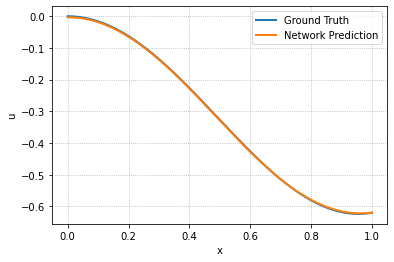

In [19]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, h1_test, label="Ground Truth",lw=2)
plt.plot(x_test, h1_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

In [20]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((h1_test_pred - h1_test)**2)/torch.mean(h1_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.002767219666566234 %


In [21]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((h2_test_pred - h2_test)**2)/torch.mean(h2_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.0024878418116713874 %


In [22]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((h3_test_pred - h3_test)**2)/torch.mean(h3_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.01791574468370527 %


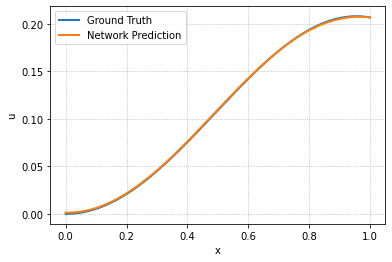

In [23]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, e1_test, label="Ground Truth",lw=2)
plt.plot(x_test, e1_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

In [24]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((e1_test_pred - e1_test)**2)/torch.mean(e1_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.0030917035473976284 %


In [25]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((e2_test_pred - e2_test)**2)/torch.mean(e2_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.0021254087187116966 %


In [26]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((e3_test_pred - e3_test)**2)/torch.mean(e3_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.00998175673885271 %


In [27]:
# for ploting

In [28]:
model = my_network
x_test = pi*torch.rand(100000).reshape(-1,1)
t_test = torch.rand(100000).reshape(-1,1)
test = torch.cat([x_test, t_test],1)
u_test = exact_solution_u(x_test,t_test).reshape(-1,1)
p_test = exact_solution_p(x_test,t_test).reshape(-1,1)
u_test_pred = my_network(test)
u_pred = u_test_pred[:, 0].reshape(-1,1)

u_pred1 = u_test_pred[:, 1].reshape(-1,1)


relative_error = torch.abs(u_pred- u_test)

relative_error1 = torch.abs(u_pred1- p_test)
u_pred = u_pred.detach().numpy()
x_test = x_test.detach().numpy()
t_test = t_test.detach().numpy()
p_pred = u_pred1.detach().numpy()
relative_error = relative_error.detach().numpy()
relative_error1 = relative_error1.detach().numpy()

NameError: name 'exact_solution_u' is not defined

In [ ]:

x_test = x_test.reshape(-1,)
t_test = t_test.reshape(-1,)

u_pred = u_pred.reshape(-1,)
p_pred = p_pred.reshape(-1,)

In [ ]:

plt.rcParams['figure.figsize'] = [10, 4]


CS = plt.tricontourf(x_test, t_test, u_pred, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


#plt.savefig('timo_u.png', dpi = 300, bbox_inches = "tight")

In [ ]:
CS = plt.tricontourf(x_test, t_test, p_pred, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('timo_p.png', dpi = 300, bbox_inches = "tight")

In [ ]:

x_test = x_test.reshape(-1, )
t_test = t_test.reshape(-1, )
relative_error = relative_error.reshape(-1,)




CS = plt.tricontourf(x_test, t_test, relative_error, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('relative_error_timo_u.png', dpi = 300, bbox_inches = "tight")

In [ ]:
relative_error1 = relative_error1.reshape(-1,)

CS = plt.tricontourf(x_test, t_test, relative_error1, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('relative_error_timo_p.png', dpi = 300, bbox_inches = "tight")